In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/amira/Desktop/WHATEVER/Financial_inclusion_dataset.csv")
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
df['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [5]:
df.describe(include='all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
df['household_size'].value_counts()

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64

In [7]:
df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

### 📦 Outlier Detection using Boxplots

Before we clean or normalize the data, it's crucial to **identify outliers** — extreme values that might skew our machine learning model.

We use **boxplots** to visually scan each numerical feature. Outliers appear as points beyond the "whiskers" of each plot. These might represent:

- Data entry errors 📝
- Rare but valid cases 💎
- Patterns worth deeper investigation 🧠

We'll review them and decide whether to cap, scale, or remove them based on their context and impact on model performance.


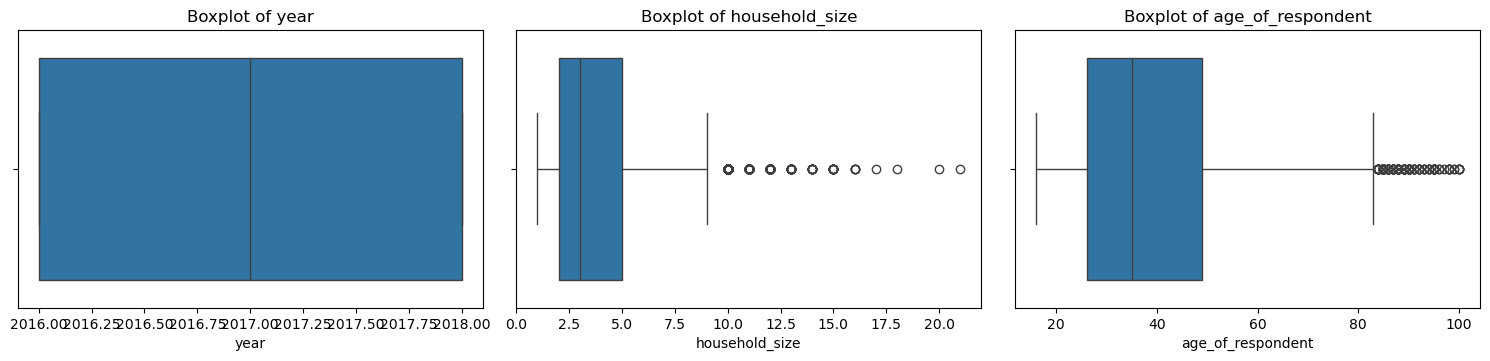

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(15, 10))

# Loop through numerical features and create boxplots
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

### 🧮 Standardizing Outliers (Z-Score Scaling)

Instead of removing outliers from features like `household_size` and `age_of_respondent`, we use **Z-score standardization** to scale the values. This transformation rescales each value based on:

- The feature’s mean (centered to 0)
- Its standard deviation (scaled to unit variance)

This helps **reduce the influence of extreme values** in modeling, especially in algorithms sensitive to magnitude like deep learning, SVM, or KNN.

We use `StandardScaler` from scikit-learn to handle this efficiently.


In [10]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Columns to standardize
cols_to_scale = ['household_size', 'age_of_respondent']

# Apply scaler
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


### 🔤 Encoding Categorical Variables

To prepare our data for machine learning models, we need to **convert categorical (text-based) columns into numerical values**.

1. **Target Variable Encoding:**
   - The target column `bank_account` has values `"Yes"` and `"No"`, which we map to binary values `1` and `0` respectively.

2. **Feature Encoding:**
   - All other object-type features (excluding `uniqueid`, which serves only as an identifier) are encoded using `LabelEncoder`, which assigns a unique numeric value to each category.
   - This approach is simple and works well for algorithms that don’t require ordinal relationships between categories.

> 🧩 Why this matters: Most machine learning models can't interpret string data — encoding helps models understand and differentiate between categories.


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
df['bank_account'] = df['bank_account'].map({'Yes': 1, 'No': 0})

# Encode all object columns (except uniqueid)
categorical_columns = df.select_dtypes(include=['object']).columns.drop('uniqueid')

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


### 🌲 Training a Random Forest Classifier

Now that our dataset is clean and encoded, we proceed to **train a classification model** to predict whether a person has a bank account.

1. **Feature Selection:**
   - `X` contains all features **except** `bank_account` (the target) and `uniqueid` (irrelevant for prediction).
   - `y` is the binary target: 1 = has a bank account, 0 = doesn't.

2. **Train-Test Split:**
   - We split the data into training (80%) and testing (20%) sets to evaluate generalization performance.
   - `random_state=42` ensures reproducibility of results.

3. **Model Selection:**
   - We use a **Random Forest Classifier**, an ensemble method that builds multiple decision trees and combines them for robust predictions.
   - It handles both numerical and categorical (encoded) features well and reduces overfitting.

> 🌟 This step prepares the model for evaluation and future deployment in a prediction pipeline.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df.drop(columns=['bank_account', 'uniqueid'])
y = df['bank_account']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Predict
y_pred = model.predict(X_test)

In [14]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8665249734325186
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4063
           1       0.51      0.40      0.45       642

    accuracy                           0.87      4705
   macro avg       0.71      0.67      0.69      4705
weighted avg       0.85      0.87      0.86      4705



### 💾 Saving the Trained Model

To use our trained Random Forest model later in a separate Python script or Streamlit app, we save it using the `joblib` library.

- The model is saved to a `.pkl` file.
- We can reload it later to make predictions without retraining.

This is essential for deployment and real-time predictions.


In [ ]:
import joblib

# Save the trained model in a pkl file
joblib.dump(model, 'random_forest_bank_model.pkl')

['random_forest_bank_model.pkl']